<a href="https://colab.research.google.com/github/pakpak123/MachineLearning/blob/main/machineLearning_lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense
import glob
from scipy import stats
import datetime as dt

In [2]:
# Load data from csv 3 files
# acceleration.txt, heartrate.txt, labeled_sleep.txt
ACC = pd.read_csv('/content/46343_acceleration.txt', sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv('/content/46343_heartrate.txt', sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv('/content/46343_labeled_sleep.txt', sep = ' ',names=['timedelta', 'sleep'])

In [3]:
ACC

,timedelta,accX,accY,accZ
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
851878,15043.412454,-0.360519,-0.212753,0.908050
851879,15043.432433,-0.357559,-0.214233,0.908066
851880,15043.452436,-0.355606,-0.213242,0.908569
851881,15043.472255,-0.354111,-0.213257,0.906143


In [4]:
HeartR

,timedelta,heartrate
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [5]:
SleepL

,timedelta,sleep
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [6]:
# Check ‘timedelta’ max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()

In [7]:
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()
print('ACC start: ',ACC_min_date,'ACC end: ',ACC_max_date)
print('HeartR start: ',HeartR_min_date,'HeartR end: ',HeartR_max_date)
print('SleepL start: ',SleepL_min_date,'SleepL end: ',SleepL_max_date)

ACC start:  -124489.16105 ACC end:  15043.4923749
HeartR start:  -556410.36066 HeartR end:  16980.47229
SleepL start:  0 SleepL end:  16980


In [8]:
# select only intersected timedelta (ACC, HeartR, SleepL)
ACC_new = ACC[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date) &(ACC['timedelta'] > HeartR_min_date) &(ACC['timedelta'] < HeartR_max_date)&(ACC['timedelta'] > SleepL_min_date) &(ACC['timedelta'] < SleepL_max_date)]
HeartR_new = HeartR[(HeartR['timedelta'] > ACC_min_date) &(HeartR['timedelta'] < ACC_max_date) &(HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date)&(HeartR['timedelta'] > SleepL_min_date) &(HeartR['timedelta'] < SleepL_max_date)]
SleepL_new = SleepL[(SleepL['timedelta'] > ACC_min_date) &(SleepL['timedelta'] < ACC_max_date) &(SleepL['timedelta'] > HeartR_min_date) &(SleepL['timedelta'] < HeartR_max_date)&(SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]

In [9]:
ACC_new

,timedelta,accX,accY,accZ
98777,0.000721,-0.234650,0.905975,0.362747
98778,0.017162,-0.231232,0.893265,0.371613
98779,0.037183,-0.227814,0.915848,0.369049
98780,0.057108,-0.240524,0.919159,0.352890
98781,0.076929,-0.240448,0.889175,0.350143
...,...,...,...,...
851877,15043.392519,-0.360016,-0.212280,0.906097
851878,15043.412454,-0.360519,-0.212753,0.908050
851879,15043.432433,-0.357559,-0.214233,0.908066
851880,15043.452436,-0.355606,-0.213242,0.908569


In [10]:
HeartR_new

,timedelta,heartrate
1576,8.47840,97
1577,13.47840,95
1578,18.47840,96
1579,19.47840,95
1580,24.47840,95
...,...,...
4496,15022.46938,77
4497,15027.46938,77
4498,15032.46938,77
4499,15037.46938,77


In [11]:
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
497,14910,2
498,14940,2
499,14970,2
500,15000,2


In [12]:
# Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'], 'seconds').round('1s'))
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'], 'seconds').round('1s'))
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'], 'seconds').round('1s'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [13]:
ACC_new

,timedelta,accX,accY,accZ
98777,0 days 00:00:00,-0.234650,0.905975,0.362747
98778,0 days 00:00:00,-0.231232,0.893265,0.371613
98779,0 days 00:00:00,-0.227814,0.915848,0.369049
98780,0 days 00:00:00,-0.240524,0.919159,0.352890
98781,0 days 00:00:00,-0.240448,0.889175,0.350143
...,...,...,...,...
851877,0 days 04:10:43,-0.360016,-0.212280,0.906097
851878,0 days 04:10:43,-0.360519,-0.212753,0.908050
851879,0 days 04:10:43,-0.357559,-0.214233,0.908066
851880,0 days 04:10:43,-0.355606,-0.213242,0.908569


In [14]:
HeartR_new

,timedelta,heartrate
1576,0 days 00:00:08,97
1577,0 days 00:00:13,95
1578,0 days 00:00:18,96
1579,0 days 00:00:19,95
1580,0 days 00:00:24,95
...,...,...
4496,0 days 04:10:22,77
4497,0 days 04:10:27,77
4498,0 days 04:10:32,77
4499,0 days 04:10:37,77


In [15]:
SleepL_new

,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
497,0 days 04:08:30,2
498,0 days 04:09:00,2
499,0 days 04:09:30,2
500,0 days 04:10:00,2


In [16]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean()

In [17]:
ACC_new2=pd.concat([df_acc_X, df_acc_Y, df_acc_Z], axis=1).reset_index()
ACC_new2['timedelta'] = ACC_new2['timedelta'] - ACC_new2['timedelta'].min()
ACC_new2

,timedelta,accX,accY,accZ
0,0 days 00:00:00,-0.243203,0.895372,0.367591
1,0 days 00:00:01,-0.240757,0.873826,0.415446
2,0 days 00:00:02,-0.244620,0.883943,0.387026
3,0 days 00:00:03,-0.248036,0.902427,0.347812
4,0 days 00:00:04,-0.241778,0.912946,0.321502
...,...,...,...,...
15039,0 days 04:10:39,-0.357004,-0.213989,0.906136
15040,0 days 04:10:40,-0.354852,-0.212050,0.907540
15041,0 days 04:10:41,-0.355704,-0.212626,0.907021
15042,0 days 04:10:42,-0.357162,-0.214460,0.906196


In [18]:
print('--------Before convert datetime and round and average to 1s---------')
print(ACC)
print('--------After convert datetime and round and average to 1s---------')
print(ACC_new2)

--------Before convert datetime and round and average to 1s---------
            timedelta      accX      accY      accZ
0      -124489.161050  0.017487 -0.586700 -0.805771
1      -124489.116395  0.018982 -0.589676 -0.809158
2      -124489.115548  0.020966 -0.580887 -0.815048
3      -124489.114691  0.019485 -0.580872 -0.813583
4      -124489.097700  0.016998 -0.587204 -0.806259
...               ...       ...       ...       ...
851878   15043.412454 -0.360519 -0.212753  0.908050
851879   15043.432433 -0.357559 -0.214233  0.908066
851880   15043.452436 -0.355606 -0.213242  0.908569
851881   15043.472255 -0.354111 -0.213257  0.906143
851882   15043.492375       NaN       NaN       NaN

[851883 rows x 4 columns]
--------After convert datetime and round and average to 1s---------
            timedelta      accX      accY      accZ
0     0 days 00:00:00 -0.243203  0.895372  0.367591
1     0 days 00:00:01 -0.240757  0.873826  0.415446
2     0 days 00:00:02 -0.244620  0.883943  0.387026
3   

In [19]:
# Resampling every 1s with median with ffill
df_heartrate = HeartR_new.groupby('timedelta')['heartrate'].mean()
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new2

,heartrate
timedelta,
0 days 00:00:08,97.0
0 days 00:00:09,97.0
0 days 00:00:10,97.0
0 days 00:00:11,97.0
0 days 00:00:12,97.0
...,...
0 days 04:10:38,77.0
0 days 04:10:39,77.0
0 days 04:10:40,77.0


In [20]:
df_heartrate = HeartR_new.groupby('timedelta')['heartrate'].mean()

resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new_2 = pd.concat([HeartR_new2], axis=1).reset_index()
HeartR_new_2['timedelta'] = HeartR_new_2['timedelta']-HeartR_new_2['timedelta'].min()
HeartR_new_2

,timedelta,heartrate
0,0 days 00:00:00,97.0
1,0 days 00:00:01,97.0
2,0 days 00:00:02,97.0
3,0 days 00:00:03,97.0
4,0 days 00:00:04,97.0
...,...,...
15030,0 days 04:10:30,77.0
15031,0 days 04:10:31,77.0
15032,0 days 04:10:32,77.0
15033,0 days 04:10:33,77.0


In [21]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:10:26,2.0
0 days 04:10:27,2.0
0 days 04:10:28,2.0


In [22]:
df_SleepL = SleepL_new.groupby('timedelta')['sleep'].mean()
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new_2 = pd.concat([SleepL_new2], axis=1).reset_index()
SleepL_new_2['timedelta'] = SleepL_new_2['timedelta']-SleepL_new_2['timedelta'].min()
SleepL_new_2

,timedelta,sleep
0,0 days 00:00:00,-1.0
1,0 days 00:00:01,-1.0
2,0 days 00:00:02,-1.0
3,0 days 00:00:03,-1.0
4,0 days 00:00:04,-1.0
...,...,...
14996,0 days 04:09:56,2.0
14997,0 days 04:09:57,2.0
14998,0 days 04:09:58,2.0
14999,0 days 04:09:59,2.0


In [23]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(ACC_new2, HeartR_new_2, on='timedelta')
df = pd.merge_asof(df, SleepL_new_2, on = 'timedelta')
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,0 days 00:00:00,-0.243203,0.895372,0.367591,97.0,-1.0
1,0 days 00:00:01,-0.240757,0.873826,0.415446,97.0,-1.0
2,0 days 00:00:02,-0.244620,0.883943,0.387026,97.0,-1.0
3,0 days 00:00:03,-0.248036,0.902427,0.347812,97.0,-1.0
4,0 days 00:00:04,-0.241778,0.912946,0.321502,97.0,-1.0
...,...,...,...,...,...,...
15039,0 days 04:10:39,-0.357004,-0.213989,0.906136,77.0,2.0
15040,0 days 04:10:40,-0.354852,-0.212050,0.907540,77.0,2.0
15041,0 days 04:10:41,-0.355704,-0.212626,0.907021,77.0,2.0
15042,0 days 04:10:42,-0.357162,-0.214460,0.906196,77.0,2.0


In [24]:
df['sleep'] = df['sleep'].replace(-1,0)
df['heartrate'].fillna(df['heartrate'].median())
df['sleep'].fillna(0)
df = df.drop(columns='timedelta')
df

,accX,accY,accZ,heartrate,sleep
0,-0.243203,0.895372,0.367591,97.0,0.0
1,-0.240757,0.873826,0.415446,97.0,0.0
2,-0.244620,0.883943,0.387026,97.0,0.0
3,-0.248036,0.902427,0.347812,97.0,0.0
4,-0.241778,0.912946,0.321502,97.0,0.0
...,...,...,...,...,...
15039,-0.357004,-0.213989,0.906136,77.0,2.0
15040,-0.354852,-0.212050,0.907540,77.0,2.0
15041,-0.355704,-0.212626,0.907021,77.0,2.0
15042,-0.357162,-0.214460,0.906196,77.0,2.0


In [25]:
# Standardized data
feature_columns = ['accX', 'accY', 'accZ', 'heartrate']
label_columns = ['sleep']
df_feature = df[feature_columns]
scaler = preprocessing.StandardScaler()
df_feature = pd.DataFrame(scaler.fit_transform(df_feature.values),index = df_feature.index,columns=df_feature.columns)
df_label = df[label_columns]

In [26]:
df_feature

,accX,accY,accZ,heartrate
0,-0.625156,3.926728,0.765225,2.520770
1,-0.619210,3.841907,0.823089,2.520770
2,-0.628601,3.881737,0.788724,2.520770
3,-0.636904,3.954503,0.741308,2.520770
4,-0.621692,3.995918,0.709496,2.520770
...,...,...,...,...
15039,-0.901779,-0.440662,1.416404,-0.576597
15040,-0.896548,-0.433030,1.418102,-0.576597
15041,-0.898618,-0.435297,1.417475,-0.576597
15042,-0.902162,-0.442520,1.416477,-0.576597


In [27]:
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
15039,2.0
15040,2.0
15041,2.0
15042,2.0


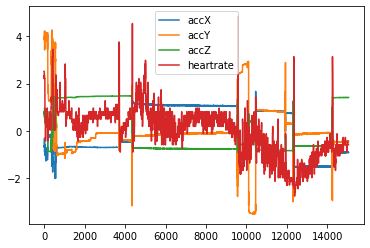

In [28]:
df_feature.plot.line()

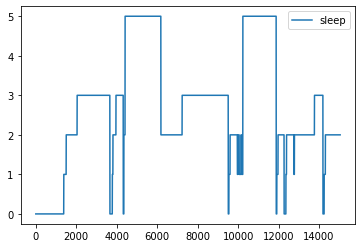

In [29]:
df_label.plot.line()

In [30]:
# ------------ Train-Test-Split 2D features -------------------------------
#X=df_feature
#y=df_label
#seed = 42
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_feature, df_label, test_size=0.3, random_state=42)

In [31]:
# set sliding window parameter
slidingW = 100
Stride_step = 5
n_feature=4
df_feature3D=np.array([],ndmin=2)
df_label_new=np.array([])

for t in range( 0 , len(df_feature), Stride_step ):
    F3d= np.array(df_feature[ t : t + slidingW],ndmin=2)
    if len(F3d)<slidingW:
        break
    F3d.reshape(slidingW, n_feature, 1)
    if df_feature3D.size==0:
        df_feature3D=F3d
    else:
        df_feature3D=np.dstack((df_feature3D,F3d))
    Labels = stats.mode( df_label [ t : t+slidingW ] )
    df_label_new=np.append(df_label_new,Labels[0])

In [32]:
F3d

array([[-0.90101955, -0.43906672,  1.41678074, -0.57659749],
       [-0.90278357, -0.4402381 ,  1.41627115, -0.57659749],
       [-0.89979781, -0.43181003,  1.41761765, -0.57659749],
       [-0.89835186, -0.42872919,  1.41834289, -0.73146587],
       [-0.90050696, -0.43707112,  1.41768481, -0.73146587],
       [-0.90235998, -0.43983442,  1.41697964, -0.73146587],
       [-0.90232068, -0.43577477,  1.41712392, -0.73146587],
       [-0.89773334, -0.42799307,  1.41871174, -0.73146587],
       [-0.89905748, -0.43407356,  1.41832059, -0.88633424],
       [-0.90219902, -0.43870505,  1.4172837 , -0.88633424],
       [-0.90238745, -0.43724298,  1.41687927, -0.88633424],
       [-0.89854043, -0.43028544,  1.41834864, -0.88633424],
       [-0.8980568 , -0.43180163,  1.41801247, -0.88633424],
       [-0.90097428, -0.4382942 ,  1.4167324 , -0.73146587],
       [-0.90273683, -0.43837949,  1.41628038, -0.73146587],
       [-0.89846552, -0.43133788,  1.41803277, -0.73146587],
       [-0.89762654, -0.

In [33]:
df_feature3D=np.swapaxes(df_feature3D,0,2)
df_feature3D=np.swapaxes(df_feature3D,1,2)
df_feature3D=df_feature3D[...,np.newaxis]
df_feature3D

array([[[[-0.62515644],
         [ 3.92672811],
         [ 0.76522455],
         [ 2.52077005]],

        [[-0.61921018],
         [ 3.84190718],
         [ 0.82308854],
         [ 2.52077005]],

        [[-0.62860071],
         [ 3.88173709],
         [ 0.78872408],
         [ 2.52077005]],

        ...,

        [[-0.95071689],
         [ 4.0447991 ],
         [ 0.30771343],
         [ 0.35261277]],

        [[-0.94839058],
         [ 4.04667817],
         [ 0.30690199],
         [ 0.35261277]],

        [[-0.93925895],
         [ 4.05398651],
         [ 0.30843593],
         [ 0.35261277]]],


       [[[-0.66737641],
         [ 3.94234573],
         [ 0.73511833],
         [ 2.21103329]],

        [[-0.69220545],
         [ 3.89374302],
         [ 0.75960277],
         [ 2.21103329]],

        [[-0.65435696],
         [ 3.91580249],
         [ 0.77031823],
         [ 2.21103329]],

        ...,

        [[-0.95597038],
         [ 4.04174748],
         [ 0.32515692],
         [ 0.352

In [34]:
df_label_new

array([0., 0., 0., ..., 2., 2., 2.])

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_feature, df_label, test_size=0.3, random_state=42)

In [36]:
x3D_train, x3D_test, y3D_train, y3D_test = model_selection.train_test_split( df_feature3D , df_label_new, test_size=0.33, random_state=42)

In [37]:
# ------------ NN Architecture parameter -------------------------------
Hidden_Layer_param = (30, 30, 30)
mlp = MLPClassifier(hidden_layer_sizes = Hidden_Layer_param)
mlp

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [38]:
mlp.fit(X_train,y_train)
smlp_pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [39]:
y_test

,sleep
13433,2.0
8530,3.0
12341,0.0
4125,3.0
8993,3.0
...,...
5733,5.0
7499,3.0
10489,5.0
2685,3.0


In [40]:
smlp_pred[0]

2.0

In [41]:
print('Confusion Matrix of smlp_pred: ')
print(confusion_matrix(y_test, smlp_pred))
print('Classification Report of smlp_preds: ')
print(classification_report(y_test, smlp_pred))

Confusion Matrix of smlp_pred: 
[[ 448    4   17   38    7]
 [   8  105   49    2    7]
 [  15   26 1195   72   25]
 [   3    0   59 1401    0]
 [   1    1   61    0  970]]
Classification Report of smlp_preds: 
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91       514
         1.0       0.77      0.61      0.68       171
         2.0       0.87      0.90      0.88      1333
         3.0       0.93      0.96      0.94      1463
         5.0       0.96      0.94      0.95      1033

    accuracy                           0.91      4514
   macro avg       0.89      0.86      0.87      4514
weighted avg       0.91      0.91      0.91      4514



In [42]:
# ------------ CNN Architecture parameter -------------------------------
# Nlayer (CNN, dense), Nnode, Activation
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
D_L1 = 512
D_out = 6
n_feature = 4
Act_func = "relu"
Ker_size = (3,3)
Pooling_size = (2,1)
Input_shape = (slidingW, n_feature, 1)

In [43]:
# ------------ Create CNN Model -------------------------------
model = models.Sequential()
model.add(layers.Conv2D(CNN_L1, kernel_size=Ker_size, activation=Act_func,input_shape=Input_shape,padding='same'))
model.add(layers.MaxPooling2D(pool_size=Pooling_size))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(CNN_L2, kernel_size=Ker_size, activation= Act_func, padding='same'))
model.add(layers.MaxPooling2D(pool_size= Pooling_size))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(CNN_L3, kernel_size=Ker_size, activation= Act_func,padding='same'))
model.add(layers.MaxPooling2D(pool_size= Pooling_size))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(D_L1 , activation= Act_func ))
model.add(layers.Dense(D_out, activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 4, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 4, 16)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 4, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 4, 64)         9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 4, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 4, 64)         0

In [44]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["acc"])

In [45]:
# ------ Train CNN using 3D feature--------------------------------------------
history = model.fit(x3D_train, y3D_train, epochs=50, batch_size=64,validation_data=(x3D_test, y3D_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 7s 193ms/step - loss: 1.2581 - acc: 0.4725 - val_loss: 0.9082 - val_acc: 0.6413
Epoch 2/50
32/32 [==============================] - 6s 186ms/step - loss: 0.6107 - acc: 0.7547 - val_loss: 0.5752 - val_acc: 0.7771
Epoch 3/50
32/32 [==============================] - 6s 186ms/step - loss: 0.4669 - acc: 0.8077 - val_loss: 0.4233 - val_acc: 0.8531
Epoch 4/50
32/32 [==============================] - 6s 186ms/step - loss: 0.3906 - acc: 0.8422 - val_loss: 0.3905 - val_acc: 0.8430
Epoch 5/50
32/32 [==============================] - 6s 188ms/step - loss: 0.3491 - acc: 0.8701 - val_loss: 0.3299 - val_acc: 0.8774
Epoch 6/50
32/32 [==============================] - 6s 184ms/step - loss: 0.3520 - acc: 0.8641 - val_loss: 0.4009 - val_acc: 0.8460
Epoch 7/50
32/32 [==============================] - 6s 187ms/step - loss: 0.2963 - acc: 0.8886 - val_loss: 0.2953 - val_acc: 0.8774
Epoch 8/50
32/32 [==============================] - 6s 189ms/step - loss: 0.2623 - acc:

In [46]:
CNN_pred = model.predict(x3D_test)

31/31 [==============================] - 1s 23ms/step


In [47]:
CNN_pred[0]

array([6.1160019e-05, 9.6990727e-02, 1.5384218e-01, 4.0943605e-01,
       2.8337698e-07, 9.9996746e-01], dtype=float32)

In [48]:
y3D_test[0]

5.0

In [49]:
print(utils.multiclass.type_of_target(CNN_pred))

continuous-multioutput


In [50]:
CNN_pred = np.argmax(model.predict(x3D_test),axis=1)

31/31 [==============================] - 1s 23ms/step


In [51]:
print(utils.multiclass.type_of_target(CNN_pred))

multiclass


In [52]:
print('Confusion Matrix of smlp_pred: ')
print(confusion_matrix(y3D_test, CNN_pred))
print('Classification Report of smlp_preds: ')
print(classification_report(y3D_test, CNN_pred))

Confusion Matrix of smlp_pred: 
[[105   1   5   0   0]
 [  0  33   5   0   0]
 [  1   1 290   9  11]
 [  0   0  10 305   0]
 [  0   1   0   0 210]]
Classification Report of smlp_preds: 
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       111
         1.0       0.92      0.87      0.89        38
         2.0       0.94      0.93      0.93       312
         3.0       0.97      0.97      0.97       315
         5.0       0.95      1.00      0.97       211

    accuracy                           0.96       987
   macro avg       0.95      0.94      0.95       987
weighted avg       0.96      0.96      0.96       987



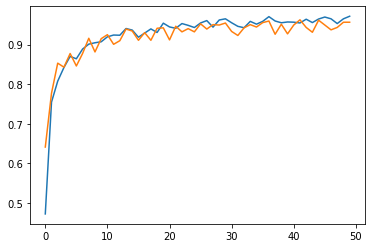

In [53]:
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

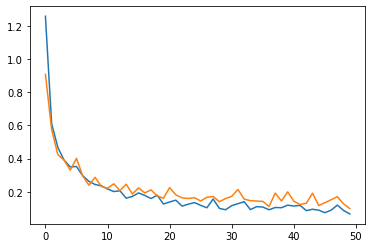

In [54]:
# View Loss Graph
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()